# Fire Hazard Incidents Analytics Pipeline
## Months vs States in the USA vs Types of Fires

## Importing Required Libraries

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

from storedb import save_in_db, IMG_PATH

## Creating Spark Session and using all available cores

In [2]:
%%time
spark = SparkSession \
    .builder \
    .appName("532: Project") \
    .config("local[4]") \
    .getOrCreate()

22/12/11 20:56:12 WARN Utils: Your hostname, Janhvis-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.109 instead (on interface en0)
22/12/11 20:56:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/11 20:56:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/11 20:56:13 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/11 20:56:13 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/12/11 20:56:13 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/12/11 20:56:13 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/12/11 20:56:13 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
CPU times: user 20.8 ms, sys: 21.9 ms, total: 42.7 ms
Wall time: 2.39 s


## Loading firefighter casuality and basic module data

In [3]:
%%time
basic_module_df = spark.read.options(delimiter="^", header=True).csv("basicincident.txt")

CPU times: user 2.83 ms, sys: 2.46 ms, total: 5.28 ms
Wall time: 2.67 s


In [4]:
incident_state = basic_module_df.select("INCIDENT_KEY", "STATE", "INC_DATE")
incident_state.groupBy('STATE').count().sort(F.desc("count")).show()

# selecting top 10 states
incident_state = incident_state.withColumn("INC_MONTH", F.month(F.to_date(incident_state.INC_DATE,"MMddyyyy")))

incidents_ca = incident_state.filter(incident_state.STATE == "CA").groupBy("INC_MONTH").count()
incidents_tx = incident_state.filter(incident_state.STATE == "TX").groupBy("INC_MONTH").count()
incidents_pa = incident_state.filter(incident_state.STATE == "PA").groupBy("INC_MONTH").count()
incidents_fl = incident_state.filter(incident_state.STATE == "FL").groupBy("INC_MONTH").count()
incidents_oh = incident_state.filter(incident_state.STATE == "OH").groupBy("INC_MONTH").count()
incidents_ny = incident_state.filter(incident_state.STATE == "NY").groupBy("INC_MONTH").count()
incidents_il = incident_state.filter(incident_state.STATE == "IL").groupBy("INC_MONTH").count()
incidents_ga = incident_state.filter(incident_state.STATE == "GA").groupBy("INC_MONTH").count()
incidents_nc = incident_state.filter(incident_state.STATE == "NC").groupBy("INC_MONTH").count()
incidents_mi = incident_state.filter(incident_state.STATE == "MI").groupBy("INC_MONTH").count()
incidents_ma = incident_state.filter(incident_state.STATE == "MA").groupBy("INC_MONTH").count()

+-----+------+
|STATE| count|
+-----+------+
|   CA|199861|
|   NY|153107|
|   TX|147339|
|   PA|111974|
|   IL|108881|
|   OH|107875|
|   FL|103816|
|   MA| 87113|
|   MI| 81673|
|   NC| 71528|
|   GA| 69030|
|   WA| 56155|
|   NJ| 55601|
|   VA| 47907|
|   TN| 46844|
|   SC| 44756|
|   CO| 41844|
|   MO| 40311|
|   IN| 38287|
|   OK| 35816|
+-----+------+
only showing top 20 rows



In [5]:
inc_ca_df = incidents_ca.toPandas()
inc_tx_df = incidents_tx.toPandas()
inc_pa_df = incidents_pa.toPandas()
inc_fl_df = incidents_fl.toPandas()
inc_oh_df = incidents_oh.toPandas()
inc_ny_df = incidents_ny.toPandas()
inc_il_df = incidents_il.toPandas()
inc_ga_df = incidents_ga.toPandas()
inc_nc_df = incidents_nc.toPandas()
inc_mi_df = incidents_mi.toPandas()
inc_ma_df = incidents_ma.toPandas()

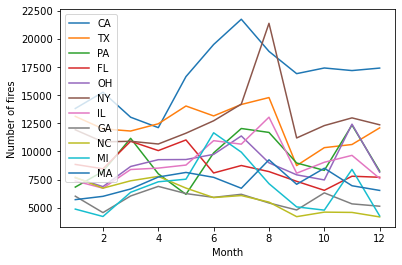

In [6]:
t1 = inc_ca_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count")
inc_tx_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_pa_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_fl_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_oh_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_ny_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_il_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_ga_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_nc_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_mi_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", ax = t1)
inc_ma_df.sort_values(by="INC_MONTH").plot(x="INC_MONTH", y="count", xlabel = "Month", ylabel = "Number of fires", ax = t1).get_figure()
plt.legend(["CA", "TX", "PA", "FL", "OH", "NY", "IL", "GA", "NC", "MI", "MA"])

fig_name = "state_inc.png"
plt.savefig(f"{IMG_PATH}{fig_name}")

# saving to db
save_in_db(fig_name, "ignition_cause_vs_dollar_losses")